# DM

## Question 1

### On a tiré aléatoirement $\theta$ un angle de la forme $k\pi$ - $\frac{\pi}{2}, k \in ]0,1[$ puis on a concaténé un vecteur de cosinus et un vecteur de sinus pour avoir des coordonées polaires auquel on a ajouté un vecteur gaussien centré de variance 0.02.

## Question 2

### $\hat{y}(x, \theta) = \sigma(Z^{[2]}) = \frac{1}{1+e^{-Z^{[2]}}} = \frac{1}{1+e^{-W^{[2]}g(W^{[1]}x + b^{[1]}) + b^{[2]}}}$ 

# TP

In [4]:
import numpy as np
import matplotlib.pyplot as plt  
import math
import torch
from torch.autograd import Variable
from torch.optim import Adam

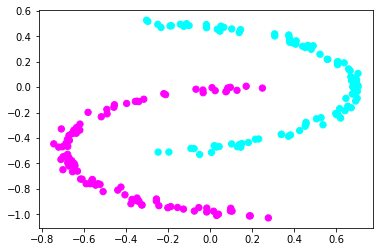

In [5]:
# DATA CREATION 2 classes

def two_moons(N=100):
    # generate two-moons dataset
    # N = number of points per class
    
    K = 2 # number of classes
    p = 2 # points in R^p
    
    X = np.zeros((N*K,p)) # data matrix (each row = single example)
    y = np.zeros(N*K, dtype='uint8') # class labels

    r = 0.5 # radius

    # Class y=0
    ix = range(0,N)
    t =   np.random.rand(N)*math.pi-math.pi/2 # theta
    X[ix] = np.c_[-0.3+2*r*np.cos(t), r*np.sin(t)] + np.random.randn(N,p)*0.02
    y[ix] = 0

    # Class y=1
    ix2 = range(N,2*N)
    t =   np.random.rand(N)*math.pi+math.pi/2 # theta
    X[ix2] = np.c_[+0.3+2*r*np.cos(t), -0.5+r*np.sin(t)]  + np.random.randn(N,2)*0.02
    y[ix2] = 1

    return X,y,p
    
def two_moons_plot(X):   
    # visualize two-moons dataset
    fig = plt.figure()
    #plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.cool)
    plt.show()

    
N=100 # number of points per class
X,y,p = two_moons(N)
two_moons_plot(X)


## Question 3

### Partie 1

* $\frac{\partial Z^{[2]}_j}{\partial A^{[1]}_{ij}} = W^{[2]}$ pour $i = 1, j=1,\dots,M$. C'est une matrice $1 \times M$
* $\frac{\partial Z^{[2]}_j}{\partial W^{[2]}_{i}} = A^{[1]}_{ij}$ pour $i\in\{1,...,d\}, j=1,\dots,M$. C'est une matrice $d \times M$ (mais les colonnes ne sont pas constantes cette fois-ci).
* $\frac{\partial Z^{[2]}_j}{\partial b^{[2]}_{i}} = 1$ pour $i\in\{1,...,d\}, j=1,\dots,M$. C'est une matrice $d \times M$ constante avec tous les coefficients égaux à 1.
* $\frac{\partial A^{[1]}_{ij}}{\partial Z^{[1]}_{ij}} = \operatorname{sech}(Z^{[1]}_{ij})^2 = 1 - \operatorname{tanh}(Z^{[1]}_{ij})^2 = 1 - (A^{[1]}_{ij})^2$ pour $i\in\{1,...,d\}, j=1,\dots,M$. C'est une matrice $d \times M$.
* $\frac{\partial Z^{[1]}_{ij}}{\partial W^{[1]}_{i}} = x$ pour $i\in\{1,2\}, j=1,\dots,M$. C'est une matrice $d \times M$ avec des lignes constantes.
* $\frac{\partial Z^{[1]}_{ij}}{\partial b^{[1]}_{i}} = 1$ pour $i\in\{1,...,d\}, j=1,\dots,M$. C'est une matrice $d \times M$ constante avec tous les coefficients égaux à 1.

### Partie 2

* $\frac{\partial \mathcal{L}}{\partial \hat{y}} =  \frac{\hat{y} - y^{(m)}}{\hat{y}(1 - \hat{y})}$ pour $m=1,\dots, M$. C'est un vecteur ligne de taille $1\times M$
* $\frac{\partial \mathcal{L}}{\partial Z^{[2]}_m} =  \hat{y} - y^{(m)}$ pour $m=1,\dots, M$. C'est un vecteur ligne de taille $1\times M$
* $\frac{\partial \mathcal{L}}{\partial W^{[2]}_i} = \sum_{m=1}^M \frac{\partial \mathcal{L}}{\partial Z^{[2]}_m} \frac{\partial Z^{[2]}_m}{\partial W^{[2]}_i}$ pour $i\in\{1,...,d\}$. (produit scalaire) Le résultat est un vecteur de taille $d$
* $\frac{\partial \mathcal{L}}{\partial b^{[2]}_i} = \sum_{m=1}^M \frac{\partial \mathcal{L}}{\partial Z^{[2]}_m} \frac{\partial Z^{[2]}_m}{\partial b^{[2]}_i}$ pour $i\in\{1\}$. (produit scalaire)  Le résultat est un scalaire.
* $\frac{\partial \mathcal{L}}{\partial A^{[1]}_{im}} = \frac{\partial \mathcal{L}}{\partial Z^{[2]}_m} \frac{\partial Z^{[2]}_m}{\partial A^{[1]}_{im}} $ pour $i\in\{1,...,d\}$ et $m=1,\dots, M$. C'est une matrice de taille $d \times M$
* $\frac{\partial \mathcal{L}}{\partial Z^{[1]}_{im}} = \frac{\partial \mathcal{L}}{\partial A^{[1]}_{im}} \frac{\partial A^{[1]}_{im}}{\partial Z^{[1]}_{im}} $ pour $i\in\{1,...,d\}$ et $m=1,\dots, M$. (produit élément à élément entre deux matrices). Le résultat est une matrice de taille $d \times M$
* $\frac{\partial \mathcal{L}}{\partial W^{[1]}_{i}} = \sum_{m=1}^M \frac{\partial \mathcal{L}}{\partial Z^{[1]}_{im}} \frac{\partial Z^{[1]}_{im}}{\partial W^{[1]}_{i}} $ pour $i\in\{1,...,d\}$. (produit élément à élément entre deux matrices, puis somme des lignes) Le résultat est un vecteur de taille $d$
* $\frac{\partial \mathcal{L}}{\partial b^{[1]}_{i}} = \sum_{m=1}^M \frac{\partial \mathcal{L}}{\partial Z^{[1]}_{im}} \frac{\partial Z^{[1]}_{im}}{\partial b^{[1]}_{i}} $ pour $i\in\{1,...,d\}$. (produit élément à élément entre deux matrices, puis somme des lignes) Le résultat est un vecteur de taille $d$


## Question 4

### 1.  En augmentant les poids et le nombre de neurones on observe un meilleur résultat de classification.

### 2. La fonction perte décroît.

### 3. Une segmentation linéaire

In [403]:
# initialize parameters randomly
x = X.T                     # each column is a p-dimensional point
y = np.reshape(y,(1,2*N))
d = 30                      # essayer avec 10 neurones pour commencer
# h = d # size of hidden layer
k = 1 #0.01
W1 = k * np.random.randn(d,p)
B1 = np.zeros((d,1))
W2 = k * np.random.randn(1,d)
B2 = np.zeros((1,1))

print(y.shape, x.shape)
print (W1.shape, B1.shape)
print (W2.shape, B2.shape)

(1, 200) (2, 200)
(30, 2) (30, 1)
(1, 30) (1, 1)


iteration:  0  loss =  158.99114840165186


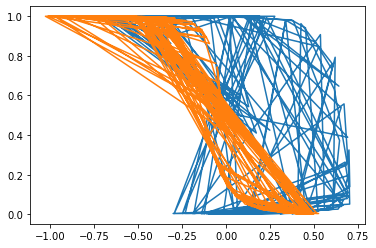

iteration:  20000  loss =  0.05362628872796327


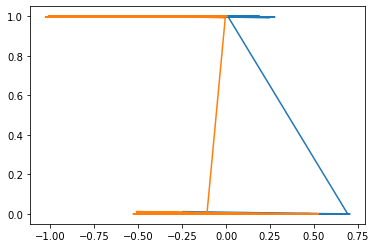

iteration:  40000  loss =  0.026871084226567865


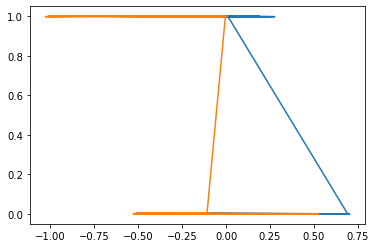

iteration:  60000  loss =  0.017950358905140094


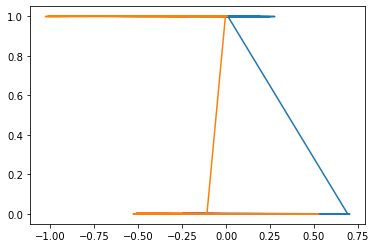

iteration:  80000  loss =  0.013481345575709755


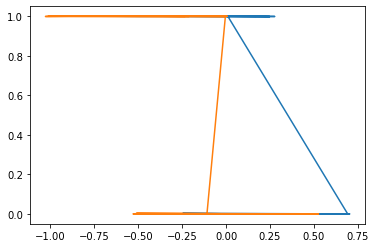

iteration:  100000  loss =  0.010795303450078723


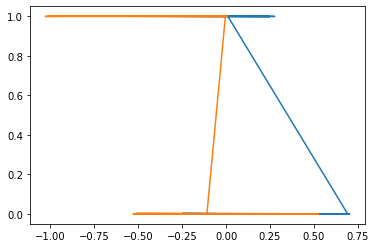

iteration:  120000  loss =  0.009002179190781055


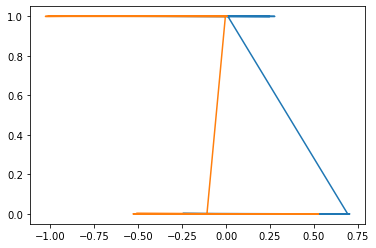

iteration:  140000  loss =  0.007720039987046404


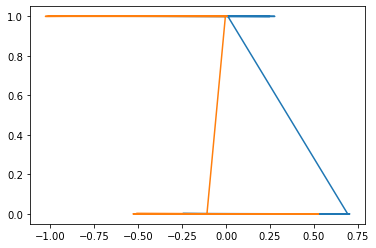

iteration:  160000  loss =  0.00675765968249065


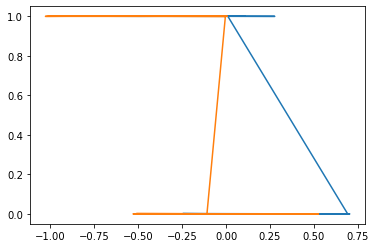

iteration:  180000  loss =  0.006008667725427972


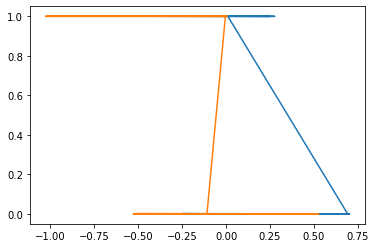

In [404]:
# some hyperparameters
learning_rate = 1e-2
M = x.shape[1]

# gradient descent loop
num_examples = X.shape[0]

for t in range(200000): #2000
    ## Forward pass: compute predicted y

    # evaluate class scores, [N x K]
    z = W1@x + B1
    #a = np.maximum(0, z) # note, ReLU activation
    a = np.tanh(z)
    z2 = W2@a + B2
    y_pred = 1/(1+np.exp(-z2))  # Sigmoid Activation funtion
    #y_pred = np.exp(y_pred)/ np.sum(np.exp(y_pred), axis=1, keepdims=True)   # softmax activation
    
    # Compute and print loss
    loss = (-np.log(y_pred)*y-np.log(1-y_pred)*(1-y)).sum()
    if np.mod(t, 20000) == 0:
        print('iteration: ', t, ' loss = ', loss)
        plt.plot(x.T, y_pred.T)
        plt.pause(0.05)

    ## forward pass 2 -- compute derivatives
    # couche 2
    dZ2_dW2 = a                                    
    dZ2_dB2 = np.ones([1, M])
    dZ2_dA1 = W2
    
    # couche 1
    dA1_dZ1 = (1 - a**2)
    #dA1_dZ1 = np.maximum(0,np.sign(a))
    
    dZ1_dW1 = np.ones([d, 2]) @ x                                   
    dZ1_dB1 = np.ones([d, M]) 

    ## backprop with previous derivatives
    # couche 2
    dL_dZ2 = y_pred - y
    dL_dW2 = dL_dZ2 @ dZ2_dW2.T
    dL_dB2 = dL_dZ2 @ dZ2_dB2.T
    # couche 1
    dL_dA1 = (dL_dZ2.T @ dZ2_dA1).T
    dL_dZ1 = dL_dA1 * dA1_dZ1
    dL_dW1 = np.sum(dL_dZ1 * dZ1_dW1, axis = 1, keepdims = True)
    dL_dB1 = np.sum(dL_dZ1 * dZ1_dB1, axis = 1, keepdims = True)
    
    # Update weights
    W1 -= learning_rate * dL_dW1
    W2 -= learning_rate * dL_dW2
    B1 -= learning_rate * dL_dB1
    B2 -= learning_rate * dL_dB2  

plt.show()

training accuracy: 1.00


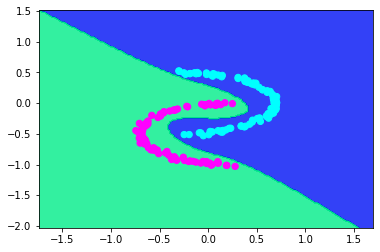

In [405]:
predicted_class = (y_pred > 0.5)
print("training accuracy: %.2f" % np.mean(predicted_class == y))

# Visualiser la segmentation
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = np.dot(np.tanh(np.dot(np.c_[xx.ravel(), yy.ravel()], W1.T) + B1.T), W2.T) + B2.T
Z = (1/(1+np.exp(-Z))>0.5)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.winter, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=np.reshape(y,[y.size]), s=40, cmap=plt.cm.cool)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [447]:
# Database in pytorch format

x = X
y = np.reshape(y,(2*N,1))
xvar = Variable(torch.from_numpy(x)).type(torch.FloatTensor)
yvar = Variable(torch.from_numpy(y)).type(torch.FloatTensor)

In [448]:
# Define the network

D_in, d, D_out =  p, 30, 1
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, d),
    torch.nn.ReLU(),
    torch.nn.Linear(d, D_out),
    torch.nn.Sigmoid(),
)
# Binary cross entropy loss
# https://pytorch.org/docs/stable/nn.html?highlight=bceloss#torch.nn.BCELoss
loss_fn = torch.nn.BCELoss()

In [461]:
# Training
learning_rate = 0.01
for t in range(2000):
    y_pred = model(xvar)
    loss = loss_fn(y_pred, yvar)
    if t % 200 == 0:
        print(t, loss.data)
    model.zero_grad()
    loss.backward()
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

0 tensor(0.0009)
200 tensor(0.0009)
400 tensor(0.0009)
600 tensor(0.0009)
800 tensor(0.0009)
1000 tensor(0.0009)
1200 tensor(0.0009)
1400 tensor(0.0009)
1600 tensor(0.0009)
1800 tensor(0.0009)


## Question 5

### Il  crée le modèle identique qu'au début

## Question 7

### On définit les points x dans $\mathbb{R}^2$ puis la sortie y on les intègre à Pytorch afin de les utiliser.
### Ensuite on entre la dimension de l'espace, le nombre de neurones et la dimension de sortie (scalaire), on met dans l'ordre du réseau les transformations linéaires et la fonction d'activation qu'on a choisit.
### On entraîne le réseau avec une descente de gradient de pas constant en affichant la fonction toutes les 100 itérations. 

training accuracy: 1.00


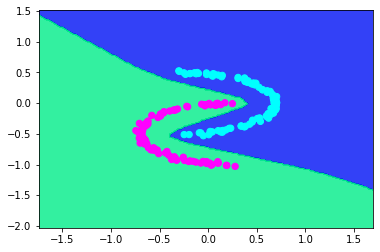

testing accuracy: 1.00


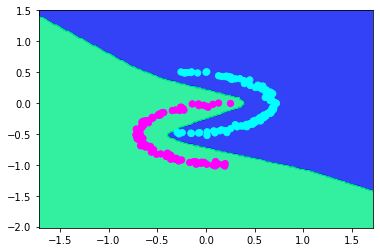

In [462]:
# Test training accuracy

def compute_accuracy(X,y,model,kind='training'):
    y_pred = model(Variable(torch.from_numpy(X)).type(torch.FloatTensor))
    scores = y_pred.data.numpy()
    predicted_class = (scores>0.5)
    print(kind+" accuracy: %.2f" % np.mean(predicted_class == y))
    
    # plot the resulting classifier
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    #Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1.T) + B1.T), W2.T) + B2.T
    X2  = np.zeros((xx.size,2))
    X2[:,0] = np.reshape(xx,[xx.size])
    X2[:,1] = np.reshape(yy,[yy.size])
    X3 = Variable(torch.from_numpy(X2)).type(torch.FloatTensor)
    scores = model(X3).data.numpy()
    Z = (scores>0.5)    
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.winter, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=np.reshape(y,[y.size]),s=40, cmap=plt.cm.cool)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()
        
compute_accuracy(X,y,model)

Ntest = 100
Xtest,ytest,p = two_moons(Ntest);
ytest = np.reshape(ytest,(2*Ntest,1))
compute_accuracy(Xtest,ytest,model,kind='testing')


## Question 8

Average training error (RMSE): 0.00319
Average testing error (RMSE): 0.01407


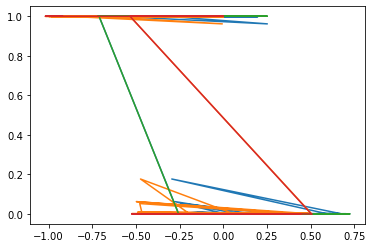

In [463]:
def plot_errors():
    # Training error
    y_pred = model(xvar)
    err = y_pred.data.numpy() - y
    print("Average training error (RMSE): %.5f" % np.sqrt(np.mean(err**2)))

    # Test error
    #xtestvar = Variable(torch.from_numpy(xtest)).type(torch.FloatTensor)
    xtestvar = torch.from_numpy(Xtest).type(torch.FloatTensor)
    ytestpred = model(xtestvar).data.numpy()
    err = ytestpred - ytest
    print("Average testing error (RMSE): %.5f" % np.sqrt(np.mean(err**2)))

    # Plot Prediction vs ground truth
    plt.plot(Xtest,ytestpred) # Prediction
    plt.plot(Xtest,ytest)     # Ground Truth
    plt.show()

plot_errors()

0 tensor(0.0009)
100 tensor(0.0007)
200 tensor(0.0006)
300 tensor(0.0005)
400 tensor(0.0004)
500 tensor(0.0003)
600 tensor(0.0003)
700 tensor(0.0002)
800 tensor(0.0002)
900 tensor(0.0002)
Average training error (RMSE): 0.00065
Average testing error (RMSE): 0.00553


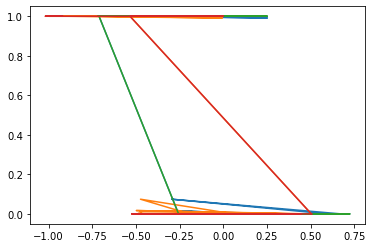

In [464]:
# Random init
#for param in model.parameters():
#    param.data = 0.01*torch.randn(param.data.size())
    
optimizer = Adam(model.parameters(),amsgrad=True,weight_decay=0)
for t in range(1000):
    def closure():
        y_pred = model(xvar)
        loss = loss_fn(y_pred, yvar)
        if t % 100 == 0:
            print(t, loss.data)
        optimizer.zero_grad()
        loss.backward()
        return loss
    optimizer.step(closure)

# training and test errors
plot_errors()

## Question 9

### Pour N = 1000 et d = 1000 on a un phenomène de sur - apprentissage avec peu d'itérations.
### Pour N = 1000 et d = 10 on a un phenomène de sous - apprentissage avec beaucoup d'itérations.

## Question 10

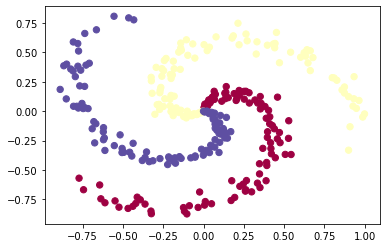

In [574]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(0,K,1):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c = y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [575]:
# Database in pytorch format

x = X
y = np.reshape(y,(K*N,1))
xvar = Variable(torch.from_numpy(x)).type(torch.FloatTensor)
yvar = Variable(torch.from_numpy(y)).type(torch.FloatTensor)

In [576]:
# Define the network

D_in, d, D_out =  p, 30, 3
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, d),
    torch.nn.Tanh(),
    torch.nn.Linear(d, d),
    torch.nn.Tanh(),
    torch.nn.Linear(d, D_out),
)

# Cross Entropy loss
loss_fn = torch.nn.CrossEntropyLoss()

In [595]:
# Training
learning_rate = .01
#for param in model.parameters():
#    param.data = 0.01*torch.randn(param.data.size());
for t in range(2000):
    y_pred = model(xvar)
    output = Variable(yvar.squeeze().long())
    loss = loss_fn(y_pred, output)
    if t % 200 == 0:
        print(t, loss.data)
    model.zero_grad()
    loss.backward()
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

0 tensor(0.0110)
200 tensor(0.0110)
400 tensor(0.0110)
600 tensor(0.0110)
800 tensor(0.0110)
1000 tensor(0.0110)
1200 tensor(0.0110)
1400 tensor(0.0110)
1600 tensor(0.0110)
1800 tensor(0.0110)


training accuracy: 0.99


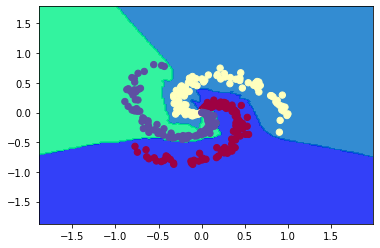

testing accuracy: 0.99


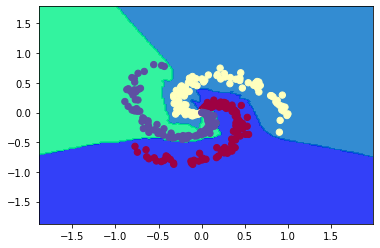

In [596]:
# Test training accuracy

def compute_accuracy(X,y,model,kind='training'):
    y_pred = model(Variable(torch.from_numpy(X)).type(torch.FloatTensor)).unsqueeze(-1)
    scores = y_pred.data.numpy()
    predicted_class = (scores > .5).argmax(axis = 1)
    print(kind+" accuracy: %.2f" % np.mean(predicted_class == y))

    # plot the resulting classifier
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    #Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1.T) + B1.T), W2.T) + B2.T
    X2  = np.zeros((xx.size,2))
    X2[:,0] = np.reshape(xx,[xx.size])
    X2[:,1] = np.reshape(yy,[yy.size])
    X3 = Variable(torch.from_numpy(X2)).type(torch.FloatTensor)
    scores = model(X3).unsqueeze(-1).data.numpy()
    Z = (scores > .5).argmax(axis = 1)
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap = plt.cm.winter, alpha = 0.8)
    plt.scatter(X[:, 0], X[:, 1], c = np.reshape(y,[y.size]),s = 40, cmap = plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

compute_accuracy(X,y,model)

Ntest = 100
Xtest, ytest, p = X, y, 2
ytest = np.reshape(ytest,(K*Ntest,1))
compute_accuracy(Xtest, ytest, model, kind = 'testing')

In [593]:
optimizer = Adam(model.parameters(),amsgrad=True,weight_decay=0)
for t in range(1000):
    def closure():
        y_pred = model(xvar)
        output = Variable(yvar.squeeze(-1).long())
        loss = loss_fn(y_pred, output)
        if t % 100 == 0:
            print(t, loss.data)
        optimizer.zero_grad()
        loss.backward()
        return loss
    optimizer.step(closure)

0 tensor(0.0110)
100 tensor(0.0110)
200 tensor(0.0110)
300 tensor(0.0110)
400 tensor(0.0110)
500 tensor(0.0110)
600 tensor(0.0110)
700 tensor(0.0110)
800 tensor(0.0110)
900 tensor(0.0110)


Average training error (RMSE): 0.12910
Average testing error (RMSE): 0.12910


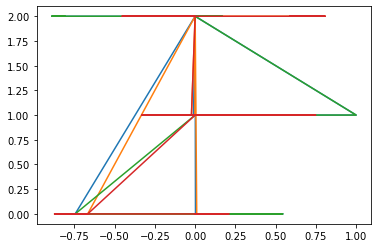

In [594]:
def plot_errors():
    
    # Training error
    y_pred = model(xvar).unsqueeze(-1).argmax(axis = 1)
    err = y_pred.data.numpy() - y
    print("Average training error (RMSE): %.5f" % np.sqrt(np.mean(err**2)))

    # Test error
    #xtestvar = Variable(torch.from_numpy(xtest)).type(torch.FloatTensor)
    xtestvar = torch.from_numpy(Xtest).type(torch.FloatTensor)
    ytestpred = model(xtestvar).unsqueeze(-1).argmax(axis = 1).data.numpy()
    err = ytestpred - ytest
    print("Average testing error (RMSE): %.5f" % np.sqrt(np.mean(err**2)))

    # Plot Prediction vs ground truth
    plt.plot(Xtest,ytestpred) # Prediction
    plt.plot(Xtest,ytest)     # Ground Truth
    plt.show()

plot_errors()